# Set up

In [0]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


In [104]:
t1=time.time()
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data=pd.read_csv(file)
t2=time.time()
print('time',t2-t1)
data.head()

time 5.890971660614014


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# ML

In [105]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [106]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [107]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [108]:
X = data.drop('Class',axis=1) 
y = data['Class']
X.shape

(284807, 30)

In [109]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    #shuffle=True ,
                                                    stratify=y,random_state=123)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(227845, 30)
(56962, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
136387,81680.0,-0.973802,0.559524,2.538997,2.398071,-0.976096,2.149748,-0.631164,0.972725,-0.149099,-0.364067,-1.991097,0.525435,1.113948,-1.075387,-1.024130,-0.688108,1.030891,-0.456315,1.690370,0.328955,-0.000142,0.249886,-0.071418,-0.648040,0.074952,1.401265,-0.041695,0.020135,101.06
214665,139768.0,2.208105,-0.951627,-2.788394,-1.942618,1.983184,3.131311,-0.848990,0.696902,-0.633813,0.810395,0.064789,-0.414141,-0.085397,0.169739,0.101061,0.550042,0.306928,-1.996282,0.701559,0.022715,0.023947,-0.005671,0.232390,0.711876,0.025019,-0.258152,-0.020661,-0.069854,11.62
274158,165878.0,2.081642,-0.015034,-1.309023,0.334923,-0.004871,-1.249462,0.207628,-0.383531,0.636140,0.010102,-0.821070,0.284115,0.170820,0.435159,0.778174,-0.139759,-0.578316,0.017393,-0.199756,-0.236281,0.250243,0.898228,-0.018674,-0.070288,0.275983,-0.094883,-0.015831,-0.058939,1.00
101822,67953.0,-0.484408,0.642081,1.380320,-1.181570,-0.998115,-1.138431,-0.080515,0.184586,-1.753744,-0.080898,0.010459,0.252111,1.668860,-0.217293,0.263256,1.050196,0.423318,-1.654008,0.637113,0.102754,0.114779,0.130982,0.157172,0.722204,-0.628034,-0.615897,0.039669,0.108707,15.00
59039,48664.0,-0.368585,1.125132,1.304311,0.068310,0.101569,-0.994461,0.724027,-0.098055,-0.465908,-0.523562,-0.128792,0.180847,0.602870,-0.523781,0.842168,0.359010,-0.018364,-0.196649,-0.094584,0.157145,-0.254401,-0.651778,-0.010525,0.347213,-0.142180,0.070202,0.247047,0.100165,4.49


In [0]:
scaler=StandardScaler()
X_train_tran=scaler.fit_transform(X_train)
X_test_tran=scaler.fit_transform(X_test)

In [111]:
X_train_tran = pd.DataFrame(X_train_tran, columns = X_train.columns)
X_test_tran = pd.DataFrame(X_test_tran, columns = X_test.columns)
X_train_tran.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792


In [0]:
y_train=pd.DataFrame(y_train)
y_train.reset_index(inplace=True,drop=True)

In [0]:
y_test=pd.DataFrame(y_test)
y_test.reset_index(inplace=True,drop=True)

## Null accuracy

In [114]:
y_test['Class'].value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

## Base method (not use any sampling)

### Logistic Regression

In [0]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [116]:
Basemodel = logReg
Basemodel.fit(X_train_tran, y_train)

y_pred=Basemodel.predict(X_test_tran)
y_pred_probs=Basemodel.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



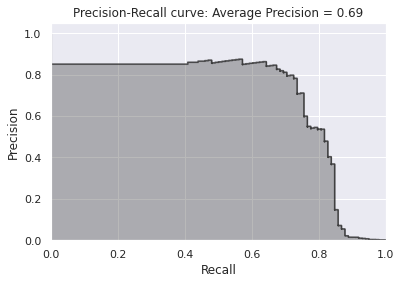

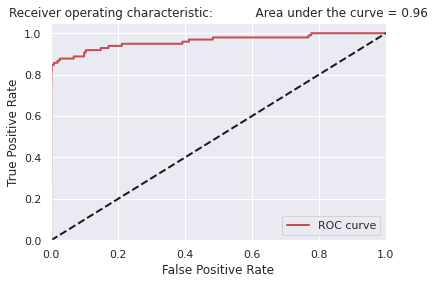

In [117]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [118]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

accuracy_score: 
 0.9783364348161933
confusion_matrix 
 [[55643  1221]
 [   13    85]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.87      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.56     56962
weighted avg       1.00      0.98      0.99     56962



### Random forest

In [0]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [120]:
Basemodel2 = RFC
Basemodel2.fit(X_train_tran, y_train)

y_pred=Basemodel2.predict(X_test_tran)
y_pred_probs=Basemodel2.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



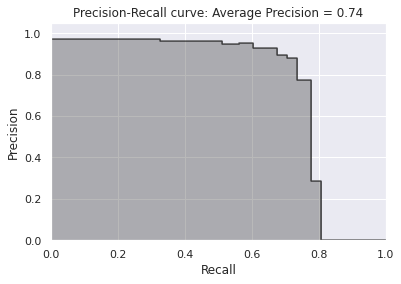

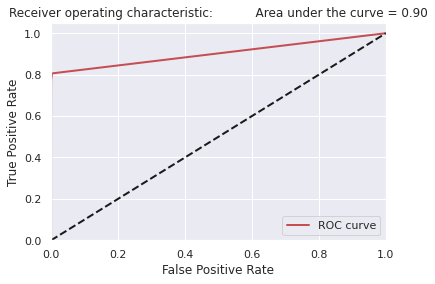

In [121]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [133]:
type(y_test)

pandas.core.frame.DataFrame

In [134]:
type(y_pred)

numpy.ndarray

In [127]:
y_test.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [131]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
y_test.shape

(56962, 1)

In [129]:
y_pred.shape

(56962,)

In [122]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

accuracy_score: 
 0.9992977774656788
confusion_matrix 
 [[56859     5]
 [   35    63]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.64      0.76        98

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



### XGB

In [0]:
params_xGB = {
    'nthread':16, #number of cores
    'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}
bst=XGBClassifier()
#bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, nfold=5, early_stopping_rounds=200, verbose_eval=50)

In [124]:
Basemodel3 = bst
Basemodel3.fit(X_train_tran, y_train)

y_pred=Basemodel3.predict(X_test_tran)
y_pred_probs=Basemodel3.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KeyboardInterrupt: ignored

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

### LightGB

In [0]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [0]:
Basemodel4 = LGBMClassifier()
Basemodel4.fit(X_train_tran, y_train)

y_pred=Basemodel4.predict(X_test_tran)
y_pred_probs=Basemodel4.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs[:,1])
average_precision = average_precision_score(y_test,y_pred_probs[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs[:,1])
areaUnderROC = auc(fpr, tpr)

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred)
print('accuracy_score: \n',accuracy_score(y_test, y_pred))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred))

## Undersampling Method

In [0]:
print(X_train_tran.shape)
print(y_train.shape)

(227845, 30)
(227845, 1)


In [0]:
# let us first join the train_x and train_y for ease of operation
trainData = pd.concat([X_train_tran,y_train],axis=1)
print(X_train_tran.shape)
print(trainData.shape)
trainData.head()

(227845, 30)
(227845, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027,0
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379,0
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699,0
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911,0
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792,0


In [0]:
trainData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [0]:
# Finding the indexes of the sample data set where the Class  is '1'
ind = trainData[trainData['Class']==1].index
print(len(ind))
# Seperate the minority classes
minData = trainData.loc[ind]
print(minData.shape)

394
(394, 31)


In [0]:
# Finding indexes of majority class
ind1 = trainData[trainData['Class']==0].index
print(len(ind1))
# Seperating the majority class
majData = trainData.loc[ind1]
print(majData.shape)
majData.head()

227451
(227451, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027,0
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379,0
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699,0
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911,0
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792,0


In [0]:
# Take a random sample equal to length of the minority class to make the data set balanced
majSample = majData.sample(n=len(ind),
                           #random_state = 123
                           )
print(majSample.shape)
majSample.head()

(394, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54320,0.395295,1.047305,-0.196908,-1.809654,-0.592621,1.771635,2.379072,-0.344836,0.600832,0.555695,-0.068579,0.060836,0.350808,-0.142735,0.718918,1.393512,-0.425431,-0.709151,-0.062434,-0.405295,-0.233295,0.362462,1.159880,0.031026,1.197969,0.702428,-0.826867,0.067031,-0.180804,-0.347699,0
68630,-0.803647,-0.144379,-0.166268,0.304307,1.341876,0.495624,0.301307,0.183125,0.227834,-0.578080,0.251336,1.435096,0.863484,-0.222636,0.566230,0.494418,-1.610749,0.882692,-0.518173,1.238983,0.502550,0.425438,1.067057,0.669784,-0.468807,-0.991756,-0.268099,0.155757,0.061753,0.122754,0
200325,0.666485,0.901685,-0.398819,-0.186466,0.785081,-0.338823,0.549455,-0.703536,0.313560,1.025370,0.282518,-0.004465,0.178295,-1.067605,0.202880,0.185041,1.156147,-1.371717,1.354703,-0.225742,-0.127629,0.133398,0.182668,0.279910,0.194866,-0.675305,-1.618712,0.109324,-0.049677,0.006954,0
171000,-1.925696,-0.235318,0.709859,-0.276678,1.089448,-0.011995,-0.016656,0.554285,0.425702,-0.764399,-0.565179,1.503315,0.826326,0.087180,-0.867113,-0.153283,-0.333973,1.771457,0.684081,0.592391,0.369992,0.216681,0.643600,0.430836,-0.171570,-0.619835,-0.509690,0.559228,0.274135,0.151246,0
57033,-0.345698,0.483446,-0.408675,0.447853,0.227837,-0.686689,-0.009488,-0.392095,0.208497,0.826709,-0.288983,-0.116485,-0.460732,-2.062023,0.371355,1.295681,-0.513233,0.782614,-1.421286,-0.915213,-0.100405,0.057557,0.007344,0.066160,0.202353,-0.059117,2.180482,-0.138186,0.053329,0.066727,0


In [0]:
# Concatenating both new data sets

balData = pd.concat([minData,majSample],axis = 0)
print('balanced data set shape',balData.shape)

balanced data set shape (788, 31)


In [0]:
# Shuffling the data set
balData = shuffle(balData)

In [0]:
balData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140661,-1.699438,-2.112861,4.936911,-9.888050,7.281641,-2.873312,-2.435403,-8.332620,3.815318,-5.191978,-10.808123,11.039460,-16.723801,0.241811,-18.458218,-0.423595,-11.781754,-16.422197,-6.001983,1.471369,1.826608,2.657164,0.350953,0.772158,-1.977490,-1.008589,1.319831,3.992874,2.169624,-0.347699,1
56502,-0.698372,-0.628458,0.604056,1.332581,0.067393,-0.567557,-0.695100,0.002169,0.430141,-0.322872,-0.602489,-0.431830,-0.312782,-0.784670,0.492668,1.265708,0.519835,-0.136075,0.015971,-0.228848,0.065082,-0.065973,-0.466183,-0.089814,1.128818,0.157405,0.444071,0.347290,0.142712,-0.288005,0
221640,0.166110,-2.824980,3.416489,-6.430177,5.932801,-3.172127,-1.128500,-5.519606,3.096671,-3.526337,-6.288555,6.901478,-10.134648,2.828937,-10.321359,-0.286898,-5.733307,-10.027270,-2.401351,1.874824,-0.083826,1.516662,0.312404,0.454108,-0.884611,-0.200881,0.875510,-0.731385,-2.838372,0.125464,1
211135,0.472778,0.023691,0.552190,0.206462,-0.414724,0.334929,-0.835509,0.847394,-0.204429,-0.134435,-0.394496,-0.784444,0.511374,0.707918,-0.027637,-0.525354,-0.147714,-0.524642,-0.998292,-0.112058,0.005951,-0.339113,-0.707000,0.095824,0.096587,-0.894599,0.282607,0.617226,0.296941,-0.340964,0
32027,-1.234183,-2.892619,3.475691,-4.646994,4.161243,-3.392034,-1.315415,-5.566684,3.201824,-5.037625,-6.873035,3.598064,-7.640729,1.697654,-8.645021,0.706849,-7.753738,-14.206895,-5.824765,3.227048,0.387211,1.516889,-1.326373,-0.177215,-0.293143,-0.170711,-0.101304,0.743748,0.658140,0.093426,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125375,0.730472,-1.299921,-0.828293,0.871936,-0.238885,0.673273,-0.673824,-0.487429,0.574191,-0.043620,-1.134521,-1.320859,-0.226610,-0.460610,0.347770,0.466292,0.733002,-0.417610,0.015546,-0.096951,0.775615,0.042367,-1.337975,0.070833,1.071022,0.408382,0.724726,-0.340195,-0.905536,0.016916,0
168511,-0.737134,-4.201767,-2.897442,-3.528837,0.849774,-2.407914,-0.997618,-1.573592,1.069601,-1.520629,-3.138600,0.140190,-4.282119,-0.242897,-3.810100,1.008624,0.962639,-4.645733,-2.156252,0.130820,-1.595728,0.586425,-0.108536,-4.926970,-0.643622,-0.552904,-0.704708,0.096691,-3.023510,0.920285,1
150889,-0.559639,-6.713873,7.693638,-6.516438,2.341196,-3.453616,4.317344,-15.001546,-30.842339,-0.353901,-4.628734,4.312816,-4.609264,-1.919952,-9.450171,-0.247382,-7.090352,-7.351209,-3.757129,0.064120,-4.516923,36.563574,-12.225554,8.446913,-1.054748,0.504313,-0.224723,3.115054,2.818107,-0.347699,1
145879,-1.832780,0.522076,1.204061,-3.137040,2.692788,-0.914865,-1.299698,-2.446775,0.734675,0.379965,-3.623960,3.495616,-7.184312,0.147209,-5.468010,1.834059,-3.015698,-1.544500,-0.467000,1.374330,0.263912,0.461278,-0.076409,1.128593,-0.613954,-3.892559,0.763074,0.968886,0.060646,-0.347699,1


In [0]:
# Making the new X_train and y_train
X_trainNew = balData.drop('Class',axis=1)
print(X_trainNew.shape)

# Making the new y_train
y_trainNew = balData['Class']
print(y_trainNew.shape)

(788, 30)
(788,)


Note: not sampling X_test and y_test. We will use model train from all sampling technique apply to train set to evaluate X test, y test

### Splot check different models

In [0]:
# Creating a list of the classifiers
classifiers = {
    'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(),
    'NB':GaussianNB(),
    'SVC':SVC(),
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging
    'AB':AdaBoostClassifier(),  #Boosting
    'GBM':GradientBoostingClassifier(), #Boosting
    'ET':ExtraTreesClassifier(), #Bagging
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New
    'LGBM':LGBMClassifier(), #New
    
}

In [0]:
#Cross validate
import time
num_folds = 10
seed = 7
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}


names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_trainNew, y_trainNew, cv=kfold, scoring=scoring,
                              return_train_score=True)

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_acc'].mean())
  train_rec_macro.append(cv_results['train_rec_macro'].mean())
  train_prec_macro.append(cv_results['train_prec_macro'].mean())
  test_acc.append( cv_results['test_acc'].mean())
  test_rec_macro.append(cv_results['test_rec_macro'].mean())
  test_prec_macro.append(cv_results['test_prec_macro'].mean())
  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_acc'].mean(),cv_results['train_rec_macro'].mean(),cv_results['train_prec_macro'].mean(),
       cv_results['test_acc'].mean(),cv_results['test_rec_macro'].mean(),cv_results['test_prec_macro'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


time : 0.593 

KNN: train_acc: 0.96 train_rec_macro: 0.96 train_prec_macro: 0.96   test_acc: 0.94 test_rec_macro: 0.94 test_prec_macro: 0.94   fit_time: 0.00
time : 0.291 

LR: train_acc: 0.96 train_rec_macro: 0.96 train_prec_macro: 0.96   test_acc: 0.95 test_rec_macro: 0.95 test_prec_macro: 0.95   fit_time: 0.02
time : 0.192 

LDA: train_acc: 0.92 train_rec_macro: 0.92 train_prec_macro: 0.93   test_acc: 0.91 test_rec_macro: 0.91 test_prec_macro: 0.92   fit_time: 0.01
time : 0.235 

CART: train_acc: 1.00 train_rec_macro: 1.00 train_prec_macro: 1.00   test_acc: 0.90 test_rec_macro: 0.90 test_prec_macro: 0.90   fit_time: 0.02
time : 0.082 

NB: train_acc: 0.92 train_rec_macro: 0.92 train_prec_macro: 0.92   test_acc: 0.92 test_rec_macro: 0.92 test_prec_macro: 0.92   fit_time: 0.00
time : 0.252 

SVC: train_acc: 0.94 train_rec_macro: 0.94 train_prec_macro: 0.94   test_acc: 0.93 test_rec_macro: 0.93 test_prec_macro: 0.93   fit_time: 0.01
time : 2.898 

RF: train_acc: 1.00 train_rec_macro: 1

In [0]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,
                                     train_acc,train_rec_macro,train_prec_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro',
                           'train_acc','train_rec_macro','train_prec_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_acc',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,train_acc,train_rec_macro,train_prec_macro,fit_time,time
1,LR,0.948004,0.947853,0.950842,0.957840,0.957840,0.959270,0.019782,0.290755
8,GBM,0.946754,0.946571,0.948904,1.000000,1.000000,1.000000,0.654465,6.628127
10,XGB,0.942908,0.942724,0.944668,0.998731,0.998731,0.998735,0.163334,1.732388
9,ET,0.940393,0.940224,0.945055,1.000000,1.000000,1.000000,0.127963,1.592036
11,LGBM,0.940377,0.940160,0.943018,1.000000,1.000000,1.000000,0.357708,3.745982
0,KNN,0.939111,0.938910,0.943824,0.957135,0.957137,0.958861,0.004137,0.592649
6,RF,0.934064,0.933814,0.938805,1.000000,1.000000,1.000000,0.261465,2.897651
7,AB,0.930234,0.929968,0.932791,0.998449,0.998448,0.998456,0.193321,2.196947
5,SVC,0.927702,0.927468,0.934965,0.938241,0.938240,0.943193,0.011271,0.251605
4,NB,0.917494,0.917276,0.923716,0.919627,0.919626,0.923728,0.002320,0.082268


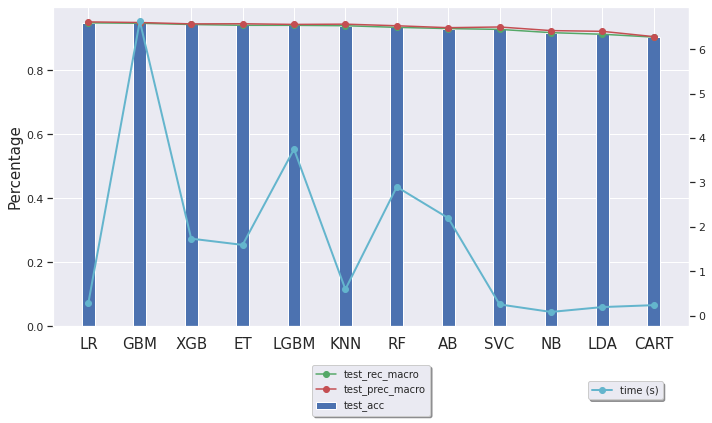

In [0]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

Benchmark model: Logistic Regression (LR)

In [0]:
churnModel1 = logReg
churnModel1.fit(X_trainNew, y_trainNew)
y_pred_1=churnModel1.predict(X_test_tran)
y_pred_probs_1=churnModel1.predict_proba(X_test_tran)

precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_1[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_1[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_1[:,1])
areaUnderROC = auc(fpr, tpr)

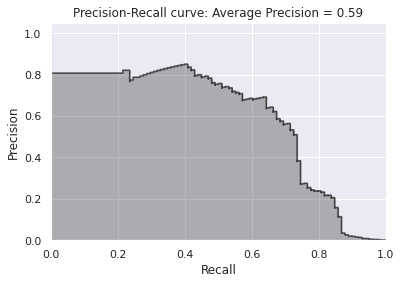

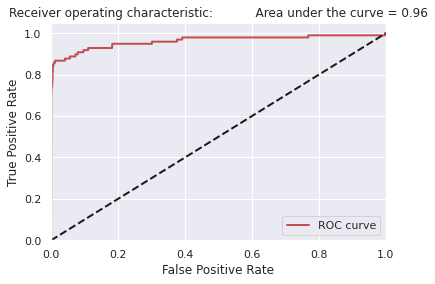

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_1)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_1))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_1))

accuracy_score: 
 0.9694357641936729
confusion_matrix 
 [[55136  1728]
 [   13    85]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.87      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



## SMOTE

In [0]:
!pip install smote_variants

In [0]:
import smote_variants as sv
# Instantiating the SMOTE class
oversampler= sv.distance_SMOTE()

Luu y: du lieu phai duoc label encoder or get dummies truoc khi thuc hien oversampler

In [0]:
# Creating new training set
X_train_smote, y_train_smote = oversampler.sample(np.array(X_train_tran), np.array(y_train['Class']))

2020-06-06 03:32:22,846:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train[y_train['Class']==0].shape)
print(X_train_tran.shape)
print(X_train_smote.shape)
# oversampler: class 1 is the same as class 0 (227451 * 2 = 454902)

(227451, 1)
(227845, 30)
(454902, 30)


In [0]:
X_train_smote_df=pd.DataFrame(X_train_smote,columns=X_train_tran.columns)
X_train_smote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792


In [0]:
churnModel2 = logReg
churnModel2.fit(X_train_smote_df, y_train_smote)

y_pred_2=churnModel2.predict(X_test_tran)
y_pred_probs_2=churnModel2.predict_proba(X_test_tran)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_2[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_2[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_2[:,1])
areaUnderROC = auc(fpr, tpr)

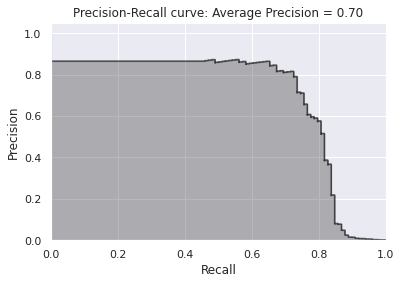

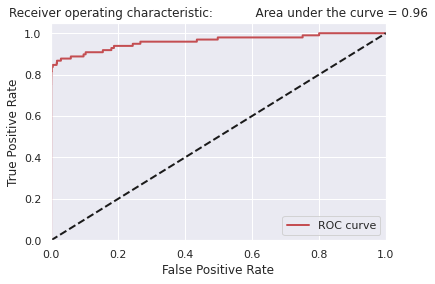

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_2)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_2))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_2))

accuracy_score: 
 0.9746673220743653
confusion_matrix 
 [[55434  1430]
 [   13    85]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962



## MSMOTE

In [0]:
# Instantiating the MSMOTE class
oversampler= sv.MSMOTE()
X_train_msmote, y_train_msmote = oversampler.sample(np.array(X_train_tran), np.array(y_train['Class']))

2020-06-06 03:35:41,229:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [0]:
print(y_train_msmote.shape)
print(X_train_msmote.shape)

(454902,)
(454902, 30)


In [0]:
X_train_msmote_df=pd.DataFrame(X_train_msmote,columns=X_train_tran.columns)
X_train_msmote_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.275963,-0.494703,0.336359,1.671146,1.691188,-0.702196,1.611537,-0.504085,0.803141,-0.133410,-0.333248,-1.950566,0.525636,1.118817,-1.120783,-1.119624,-0.786259,1.211697,-0.544076,2.077049,0.425314,-0.000323,0.341842,-0.115680,-1.068943,0.143695,2.911405,-0.103383,0.060435,0.051027
1,0.947087,1.124827,-0.572978,-1.833570,-1.368108,1.426447,2.347185,-0.678366,0.575397,-0.574240,0.742779,0.062094,-0.413704,-0.086610,0.176043,0.110164,0.626883,0.360042,-2.381476,0.862493,0.029315,0.032055,-0.009666,0.368296,1.174321,0.048042,-0.534724,-0.051754,-0.209520,-0.305379
2,1.496837,1.060460,-0.009382,-0.860340,0.237091,-0.003583,-0.936056,0.167027,-0.316704,0.580736,0.009561,-0.805139,0.284377,0.170906,0.452483,0.850220,-0.160410,-0.681341,0.021125,-0.244591,-0.305594,0.336222,1.233606,-0.031658,-0.115906,0.528794,-0.195663,-0.039900,-0.176775,-0.347699
3,-0.564987,-0.245610,0.386038,0.908891,-0.831725,-0.718034,-0.852843,-0.063514,0.152384,-1.592775,-0.073813,0.008907,0.252380,1.676543,-0.227060,0.287436,1.197725,0.496961,-1.973095,0.783334,0.132813,0.154143,0.178294,0.248471,1.191358,-1.202961,-1.277657,0.096322,0.326137,-0.291911
4,-0.971120,-0.186659,0.676714,0.858887,0.049184,0.072981,-0.744942,0.580194,-0.080990,-0.421536,-0.479375,-0.127417,0.181135,0.605147,-0.546274,0.920163,0.408851,-0.022625,-0.234257,-0.115409,0.203146,-0.342076,-0.898357,-0.018676,0.572787,-0.272249,0.147172,0.605324,0.300513,-0.333792


In [0]:
churnModel3 = LogisticRegression()
churnModel3.fit(X_train_msmote_df, y_train_msmote)
y_pred_3=churnModel3.predict(X_test_tran)
y_pred_probs_3=churnModel3.predict_proba(X_test_tran)
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_probs_3[:,1])
average_precision = average_precision_score(y_test,y_pred_probs_3[:,1])

fpr, tpr, thresholds = roc_curve(y_test,y_pred_probs_3[:,1])
areaUnderROC = auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



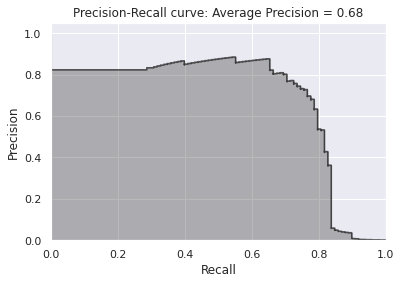

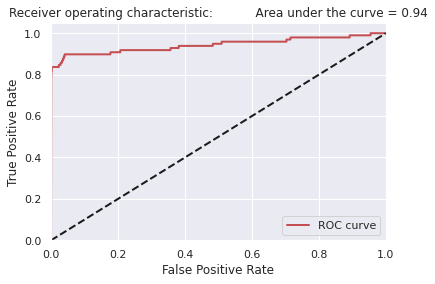

In [0]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [0]:
confmat = confusion_matrix(y_test,y_pred_3)
print('accuracy_score: \n',accuracy_score(y_test, y_pred_3))
print('confusion_matrix \n',confmat)
print('classification_report \n',classification_report(y_test, y_pred_3))

accuracy_score: 
 0.9973315543695798
confusion_matrix 
 [[56729   135]
 [   17    81]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.83      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.91      0.76     56962
weighted avg       1.00      1.00      1.00     56962



## Predictions with all three models

In [0]:
# Predicting using Under sampler
y_pred_us = churnModel1.predict(X_test_tran)
y_pred_probs_us=churnModel1.predict_proba(X_test_tran)
# Predicting using SMOTE
y_pred_smote = churnModel2.predict(X_test_tran)
y_pred_probs_smote=churnModel2.predict_proba(X_test_tran)
# Predicting using MSMOTE
y_pred_msmote = churnModel3.predict(X_test_tran)
y_pred_probs_msmote=churnModel3.predict_proba(X_test_tran)

In [0]:
# Printing accuracy of each model
print('Accuracy on test set for Random Undersampled data set: {:.2f}'.format(churnModel1.score(X_test_tran, y_test)))
print('Accuracy on test set for SMOTE data set: {:.2f}'.format(churnModel2.score(X_test_tran, y_test)))
print('Accuracy on test set for MSMOTE data set: {:.2f}'.format(churnModel3.score(X_test_tran, y_test)))

Accuracy on test set for Random Undersampled data set: 0.97
Accuracy on test set for SMOTE data set: 0.97
Accuracy on test set for MSMOTE data set: 1.00


Null accuracy

In [0]:
y_test['Class'].value_counts(normalize=True)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [0]:
 def ROC_plot(y_test,y_pred_probs):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
  print('AUC',auc(fpr, tpr))
  fig, ax = plt.subplots()
  ax.plot(fpr, tpr)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title('ROC curve')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  # Type I error: False positive. if FP high so Type II will be decreased
  # Type II error: False negative

In [0]:
def pre_recal_curve(y_test, y_pred):
  precision, recall, threshold = precision_recall_curve(y_test, y_pred)#
  average_precision = average_precision_score(y_test,y_pred)
  print('average_precision: ',average_precision)
  #auc= auc(recall, precision)
  # plot the precision-recall curves
  no_skill = len(y_test[y_test['Class']==1]) / len(y_test)
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  plt.plot(recall, precision, marker='.', label='Model')
  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

In [102]:
y_pred_us

NameError: ignored

In [0]:
# Metrics for Random undersample data set
print(confusion_matrix(y_test, y_pred_us))
print(classification_report(y_test, y_pred_us))

[[55232  1632]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



AUC 0.9683588052553604


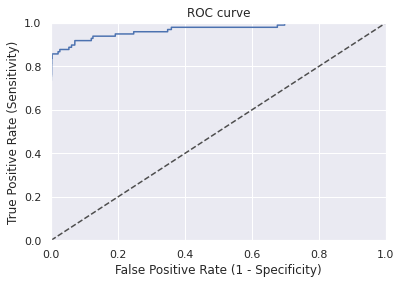

In [0]:
ROC_plot(y_test['Class'],y_pred_probs_us[:,1])

average_precision:  0.6789530957841322


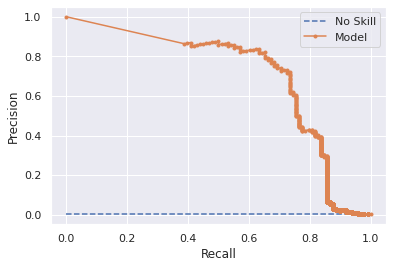

In [0]:
pre_recal_curve(y_test,y_pred_probs_us[:,1])

In [0]:
# Metrics for SMOTE data set
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

[[55416  1448]
 [   13    85]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.87      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962



AUC 0.9606432067058676


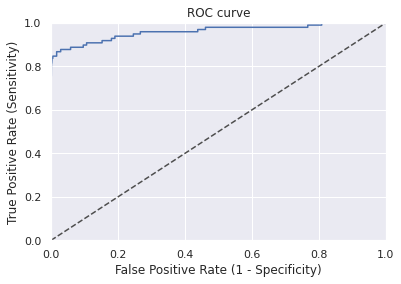

In [0]:
ROC_plot(y_test['Class'],y_pred_probs_smote[:,1])

average_precision:  0.6957393833706752


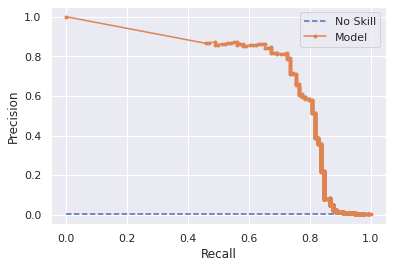

In [0]:
pre_recal_curve(y_test,y_pred_probs_smote[:,1])

In [0]:
# Metrics for MSMOTE data set
print(confusion_matrix(y_test, y_pred_msmote))
print(classification_report(y_test, y_pred_msmote))

[[56728   136]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.83      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.91      0.76     56962
weighted avg       1.00      1.00      1.00     56962



AUC 0.9429194827903025


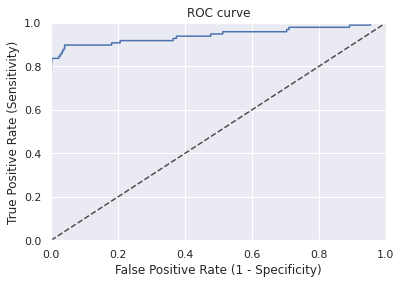

In [0]:
ROC_plot(y_test,y_pred_probs_msmote[:,1])

average_precision:  0.6819673394139731


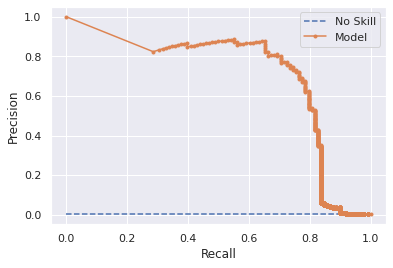

In [0]:
pre_recal_curve(y_test,y_pred_probs_msmote[:,1])

In [0]:
y_pred_probs_us[:,1]

array([0.00916617, 0.01165498, 0.01879368, ..., 0.39227336, 0.00261358,
       0.01364838])

In [0]:
y_test['Class']

0        0
1        0
2        0
3        0
4        0
        ..
56957    0
56958    0
56959    0
56960    0
56961    0
Name: Class, Length: 56962, dtype: int64

In [0]:
f1 = f1_score(y_test, y_pred_us)
print('model: f1=%.3f' % (f1))

model: f1=0.095


In [0]:
Pre_Rec_df = pd.DataFrame([threshold,precision,recall]).T
Pre_Rec_df.columns= ["Thresholds", "Precision", "Recall"]
Pre_Rec_df

,Thresholds,Precision,Recall
0,0.010898,0.002878,1.000000
1,0.010899,0.002849,0.989796
2,0.010899,0.002849,0.989796
3,0.010900,0.002849,0.989796
4,0.010901,0.002849,0.989796
...,...,...,...
31586,0.999391,1.000000,0.051020
31587,0.999406,1.000000,0.040816
31588,0.999416,1.000000,0.030612
31589,0.999432,1.000000,0.020408


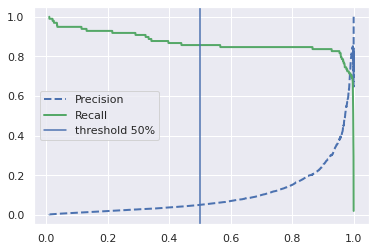

In [0]:
plt.plot(threshold, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(threshold, recall[:-1], "g-", label="Recall", linewidth=2)

plt.axvline(x=0.5,label="threshold 50%")

plt.legend()
plt.show()